In [1]:
from data import DecisionTreeData

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'data'

In [ ]:
data = DecisionTreeData(r'breast+cancer+wisconsin+diagnostic/wdbc.data')
X = data.get_X()
y = data.get_y()
X_train, X_test, y_train, y_test = data.split_data(X, y, test_size=0.3)

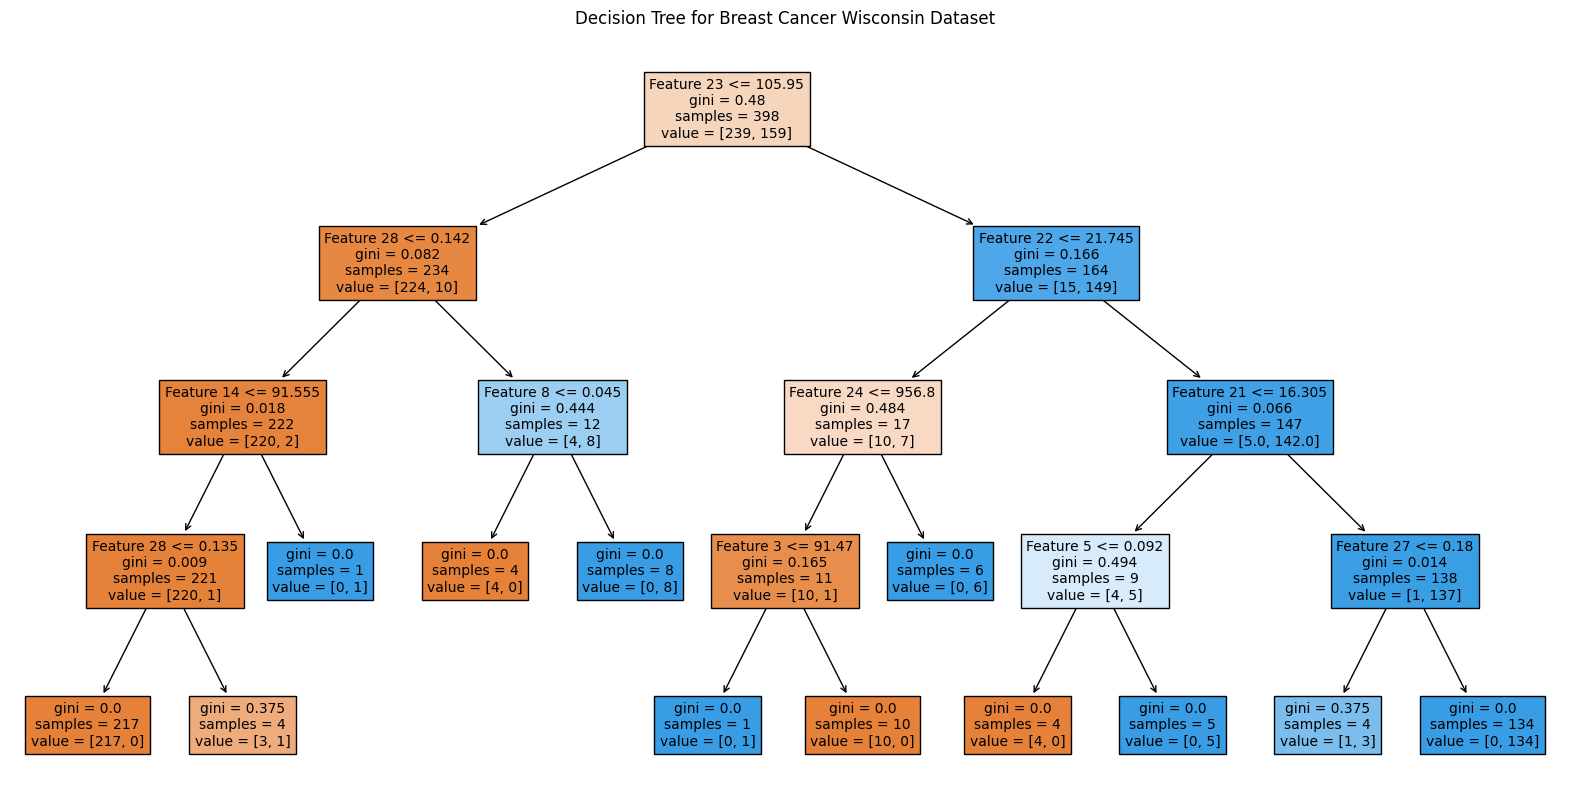

({1: 0.8771929824561403,
  2: 0.8713450292397661,
  3: 0.9005847953216374,
  4: 0.9122807017543859,
  5: 0.9064327485380117,
  6: 0.9064327485380117,
  7: 0.9064327485380117,
  8: 0.9064327485380117,
  9: 0.9064327485380117,
  10: 0.9064327485380117,
  11: 0.9064327485380117,
  12: 0.9064327485380117,
  13: 0.9064327485380117,
  14: 0.9064327485380117,
  15: 0.9064327485380117,
  16: 0.9064327485380117,
  17: 0.9064327485380117,
  18: 0.9064327485380117,
  19: 0.9064327485380117,
  20: 0.9064327485380117},
 4)

In [ ]:
depths = [depth for depth in range(1, 21)]
scores = {}
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    score = dt.score(X_test, y_test)
    scores[depth] = score

# Find the best depth
best_depth = max(scores, key=scores.get)
best_dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_dt.fit(X_train, y_train)

# Visualize the best tree
plt.figure(figsize=(20,10))
tree_plot = plot_tree(
    decision_tree=best_dt,
    filled=True,
    feature_names=[f'Feature {i}' for i in range(1, X_train.shape[1] + 1)],
    fontsize=10
)
plt.title('Decision Tree for Breast Cancer Wisconsin Dataset')
plt.show()

scores, best_depth

In [ ]:
feature_importances = best_dt.feature_importances_

# Get indices of sorted importances
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the most significant 5, 10, 15, and 20 features based on their importance scores
top_5_features = sorted_indices[:5]
top_10_features = sorted_indices[:10]
top_15_features = sorted_indices[:15]
top_20_features = sorted_indices[:20]

# Print the indices of the selected features
top_5_features, top_10_features, top_15_features, top_20_features

(array([22, 27, 21, 23,  7], dtype=int64),
 array([22, 27, 21, 23,  7,  4, 20, 13,  2, 26], dtype=int64),
 array([22, 27, 21, 23,  7,  4, 20, 13,  2, 26,  6,  8, 29,  5,  3],
       dtype=int64),
 array([22, 27, 21, 23,  7,  4, 20, 13,  2, 26,  6,  8, 29,  5,  3, 10,  1,
         9, 14, 11], dtype=int64))

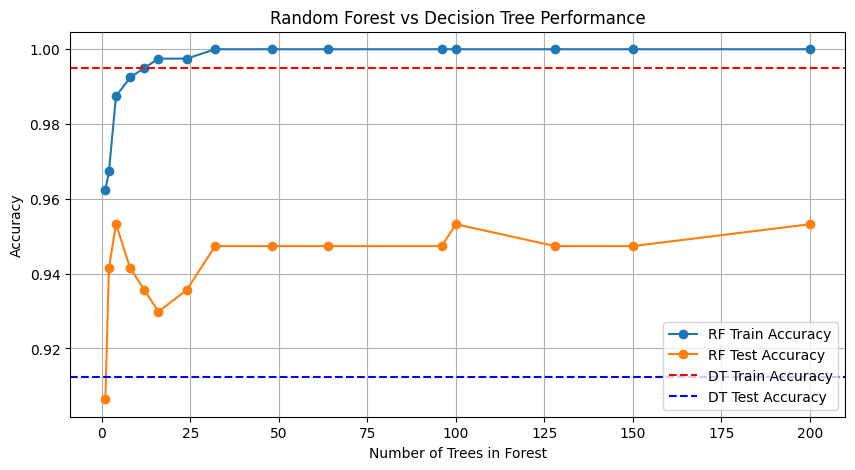

In [ ]:
num_trees = [1, 2, 4, 8, 12, 16, 24, 32, 48, 64, 96, 100, 128, 150, 200]
train_scores_rf = []
test_scores_rf = []
train_scores_dt = best_dt.score(X_train, y_train)
test_scores_dt = best_dt.score(X_test, y_test)

for n in num_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_scores_rf.append(rf.score(X_train, y_train))
    test_scores_rf.append(rf.score(X_test, y_test))

# Plotting the performances
plt.figure(figsize=(10, 5))
plt.plot(num_trees, train_scores_rf, label='RF Train Accuracy', marker='o')
plt.plot(num_trees, test_scores_rf, label='RF Test Accuracy', marker='o')
plt.axhline(y=train_scores_dt, color='r', linestyle='--', label='DT Train Accuracy')
plt.axhline(y=test_scores_dt, color='b', linestyle='--', label='DT Test Accuracy')
plt.xlabel('Number of Trees in Forest')
plt.ylabel('Accuracy')
plt.title('Random Forest vs Decision Tree Performance')
plt.legend()
plt.grid(True)
plt.show()